In [1]:
#Needed libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

RTS = DATA  
DATA = ACK

In [2]:
# We will be defining our node state through numbers from 0 to N+1
def simulated_session_time(p_a,p,N=3,Tmax=12,t_idle=2,t_rts=10,t_out=2,t_bo=2,t_data=2):
    session_time=0
    
    nth_try = 0 #Correspond to state idle
    session_time += t_idle
  
    data_to_send = True if np.random.randint(0,100)  < np.round(100*p_a) else False
    
    if data_to_send:
        nth_try = 1
        trans_success = False
        
        while np.logical_and(nth_try <= N+1, (not trans_success)):
            t_back_off = np.random.randint(0,nth_try *Tmax)*t_bo # Back off time
            session_time += (t_back_off + t_rts)
            
            trans_success = True if  np.random.randint(0,100) < np.round(100*(1-p)) else False
            if trans_success:
                session_time += (t_data) ## From State_Data to State_idle
                break
            else:
                session_time += t_out ## Out^(nth)
            nth_try += 1
        
    return session_time
            

In [3]:
def theoritical_session_time(p_a,p,N=3,Tmax=12,t_idle=2,t_rts=10,t_out=2,t_bo=2,t_data=2):
    D_data = p_a*t_data*(1-np.power(p,N+1))
    D_rts = p_a*t_rts*(1-np.power(p,N+1))/(1-p)
    D_out = p_a*t_out*p*(1-np.power(p,N+1))/(1-p)
    D_bo = p_a*t_bo*(Tmax*(1-np.power(p,N+1)*(1+(N+1)*(1-p)))-(1-p)*(1-np.power(p,N+1)))/(2*np.power(1-p,2))
    
    pi_idle = t_idle/(t_idle + p_a*(D_data+D_rts+D_out+D_bo))
    
    session_time = t_idle + D_data+D_rts+D_out+D_bo
    #print ("Data: ",p_a*D_data," RTS: ",p_a*D_rts," OUT: ",p_a*D_out," BackOff: ",p_a*D_bo," Pi: ",pi_idle," Total: ",session_time)
    return session_time

### Simulation parameters

N = 3      Tmax = 12 

t_idle = t_ack = t_out = t_bo = 2 

t_data = 10


In [24]:
def draw_plot(xx,data,labels, styles, title, xlabel, ylabel,figname, plt=plt):
    
    fig,ax = plt.subplots()
    
       
    if len(data)>1:
        for j, data_i in enumerate(data):
            ax.plot(xx,data_i,styles[j],label=f'${labels[j]}$')
    else:
        ax.plot(xx,data[0],styles,label=f'${labels}$')
    
    yy_min = np.min(data)
    yy_max = np.max(data)
    deltay = round((yy_max-yy_min)/4,2)
    ax.set_yticks([round(yy_min,2),round(yy_min,2) + deltay,round(yy_min,2) + 2*deltay,
                   round(yy_min,2) + 3*deltay,round(yy_max,2)])
    ax.set_xticks([0,0.25,0.5,0.75,1])
    
    ax.legend(frameon=False, loc='lower right', ncol=2,fontsize=13)
    ax.set_title(title,fontweight ="bold")
    
    # sets axes labels on both ends
    ax.annotate(xlabel, xy=(0.35, -0.095), ha='left', va='top', xycoords='axes fraction', fontsize=13)
    ax.annotate(ylabel, xy=(-0.1, 0.67), xytext=(-15,2), ha='left', va='top', xycoords='axes fraction', 
                textcoords='offset points', fontsize=13)
    fig.savefig(figname+'.png',dpi=600)

Wall time: 1.03 s


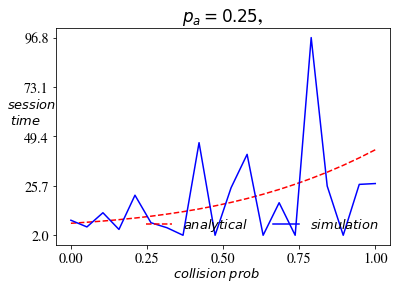

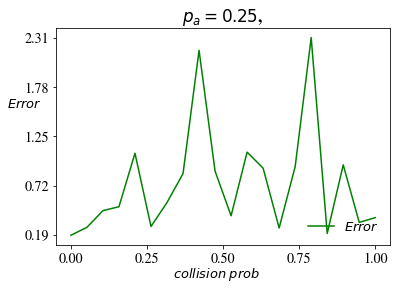

In [25]:
%%time
p_a_val = [0.25]
si_pa = []
an_pa = []
er_pa = []
for p_a in p_a_val:
    analytical_time = []
    simulation_time = []

    collision_prob = np.linspace(0,0.9999,20)
    for p in collision_prob:
        analytical_time.append(theoritical_session_time(p_a=p_a,p=p))
        simulated_sessions_time = []
        for j in range(5):
            simulated_sessions_time.append(simulated_session_time(p_a=p_a,p=p))
        simulation_time.append(np.mean(simulated_sessions_time))

    analytical_time = np.array(analytical_time)
    simulation_time = np.array(simulation_time) 

    si_pa.append(simulation_time)
    an_pa.append(analytical_time)
    error= np.abs((analytical_time-simulation_time))/analytical_time

    er_pa.append(error)
    
    draw_plot(xx=collision_prob,data=[analytical_time,simulation_time],
             labels = ['analytical','simulation'],styles=['r--','b-'],
             title = f'$p_a = {p_a}$,',xlabel = '$collision$ $prob$',
              ylabel='$session$ \n $time$',figname=f'Session time p_a = {p_a}')


    draw_plot(xx=collision_prob,data=[error],
             labels = 'Error',styles='g-',
             title = f'$p_a = {p_a}$,',xlabel = '$collision$ $prob$',
              ylabel='$Error$',figname=f'Error p_a = {p_a}')

np.save("sim2.npy", np.array(si_pa))
np.save("an2.npy", np.array(an_pa))
np.save("err2.npy", np.array(er_pa))

In [13]:
si_pa025 = np.load("sim2.npy")[0]
an_pa025 = np.load("an2.npy")[0]
er_pa025 = np.load("err2.npy")[0]
si_pa05 = np.load("sim.npy")
an_pa05 = np.load("an.npy")
er_pa05 = np.load("err.npy")

In [14]:
si_p = []
si_p.append(si_pa025)
for i in range(len(si_pa05)):
    si_p.append(si_pa05[i])

In [15]:
an_p = []
an_p.append(an_pa025)
for i in range(len(an_pa05)):
    an_p.append(an_pa05[i])

In [16]:
er_p = []
er_p.append(er_pa025)
for i in range(len(er_pa05)):
    er_p.append(er_pa05[i])

In [17]:
er_p

[array([0.0004209 , 0.0015255 , 0.00550548, 0.0028253 , 0.00033574,
        0.00353124, 0.01021617, 0.0011005 , 0.00382623, 0.00747263,
        0.00779447, 0.00167815, 0.00089872, 0.00891063, 0.00495492,
        0.00256313, 0.0016263 , 0.00690953, 0.00613159, 0.00211993]),
 array([0.00035081, 0.00414235, 0.00615939, 0.00173684, 0.00173344,
        0.00451966, 0.00523509, 0.00285044, 0.00274776, 0.00867334,
        0.006922  , 0.00161518, 0.00123193, 0.01001489, 0.00592908,
        0.00126109, 0.00456208, 0.00966023, 0.00542531, 0.00275127]),
 array([5.75600000e-04, 4.16305829e-03, 7.57790580e-03, 3.11155011e-03,
        2.82664260e-03, 4.72270776e-03, 8.07965493e-03, 3.34434473e-03,
        7.70159193e-04, 6.44378479e-03, 7.48252525e-03, 1.89284084e-03,
        2.27848707e-03, 7.81507552e-03, 6.64861068e-03, 1.97366379e-03,
        3.12160846e-03, 8.96133170e-03, 5.27453124e-03, 7.93384791e-05])]

In [18]:
np.shape(er_p[0])

(20,)

In [19]:
# np.save("simulation.npy", np.array(si_p))
# np.save("analytic.npy", np.array(an_p))
# np.save("error.npy", np.array(er_p))

# Отрисовка данных

In [30]:
simulation_pa_025 = np.load("simulation.npy")[0]
simulation_pa_05 = np.load("simulation.npy")[1]
simulation_pa_1 = np.load("simulation.npy")[2]
analytical_pa_025 = np.load("analytic.npy")[0]
analytical_pa_05 = np.load("analytic.npy")[1]
analytical_pa_1 = np.load("analytic.npy")[2]
error_pa_025 = np.load("error.npy")[0]
error_pa_05 = np.load("error.npy")[1]
error_pa_1 = np.load("error.npy")[2]
collision_prob = np.linspace(0,0.9999,20)

In [31]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib
from matplotlib import pyplot as plt
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams.update({'font.size': 20})

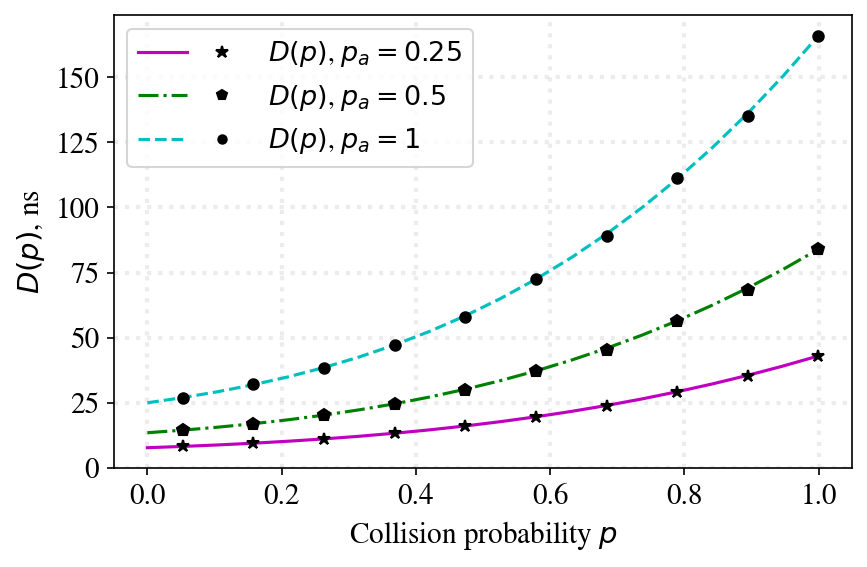

In [32]:
fig = plt.figure(dpi=150)
ax0 = plt.subplot2grid((1, 1), (0, 0))

ax0.plot(collision_prob, analytical_pa_025, "m-", label="$D_{an}$, $p_a=0.25$")
ax0.plot(collision_prob[1::2], simulation_pa_025[1::2], "k*", markersize=6, label="$D_{sim}$, $p_a=0.25$")
ax0.plot(collision_prob, analytical_pa_05, "g-.", label="$D_{an}$, $p_a=0.5$")
ax0.plot(collision_prob[1::2], simulation_pa_05[1::2], "kp", markersize=6, label="$D_{sim}$, $p_a=0.5$")
ax0.plot(collision_prob, analytical_pa_1, "c--", label="$D_{an}$, $p_a=1$")
ax0.plot(collision_prob[1::2], simulation_pa_1[1::2], "ko", markersize=5, label="$D_{sim}$, $p_a=1$")

an1 = Line2D([0], [0], ls='-', color='m')
an2 = Line2D([0], [0], ls='-.', color='g')
an3 = Line2D([0], [0], ls='--', color='c')

si1 = Line2D([0], [0], lw=0, marker='*', markersize=6, color='black')
si2 = Line2D([0], [0], lw=0, marker='p', markersize=5, color='black')
si3 = Line2D([0], [0], lw=0, marker='o', markersize=4, color='black')

l = ax0.legend(
    [(an1, si1), (an2, si2), (an3, si3)], 
    ['$D(p)$, $p_a=0.25$', '$D(p)$, $p_a=0.5$', '$D(p)$, $p_a=1$'], 
    handlelength=4,
    handler_map={tuple: HandlerTuple(ndivide=None)}, loc=2, prop={'size': 13})

ax0.set_xlabel("Collision probability $p$")
ax0.set_ylabel("$D(p)$, ns")
ax0.grid(b=True, color='gray', alpha=0.15, linestyle=':', linewidth=2)

plt.tight_layout()
plt.savefig("fig 5 simulation results.png", dpi=600)
plt.show()

In [33]:
error_pa_025.max(), error_pa_05.max(), error_pa_1.max()

(0.010216172087782234, 0.010014888725811239, 0.008961331700640996)